In [37]:
import numpy as np

In [38]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

In [41]:
dfh = pd.read_csv(r"C:\Users\Saniya Mirza\Downloads\heart.csv")

In [42]:
dfh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
dfh["target"].unique()

array([1, 0], dtype=int64)

In [45]:
dfh["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Checking NaNs

In [46]:
dfh.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Detect Error

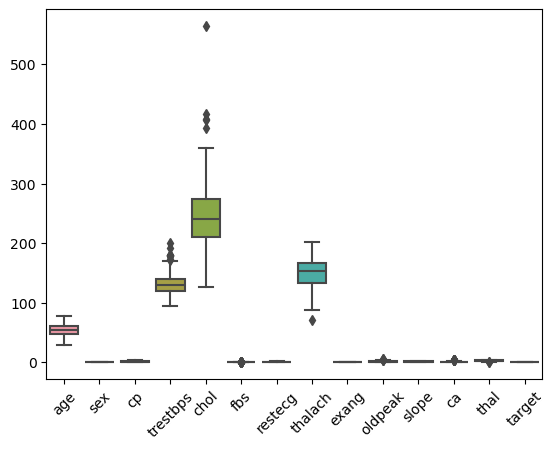

In [47]:
sns.boxplot(dfh)
plt.xticks(rotation = 45)
plt.show()

In [48]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
cols = ['trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'ca', 'thal']

In [50]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [51]:
for c in cols:
    sk = dfh[c].skew().round()
    if sk == 0 or sk == -0:
        m = dfh[c].mean()
        s = dfh[c].std()
        lower = m - 3 * s
        upper = m + 3 * s
        dfh[c] = dfh[c].map(lambda x : lower if x < lower else upper if x > upper else x)
    else :
        q1 = dfh[c].quantile(0.25)
        q3 = dfh[c].quantile(0.75)
        iqr = q1 - q3
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        dfh[c] = dfh[c].map(lambda x : low if x < low else high if x > high else x)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'target')])

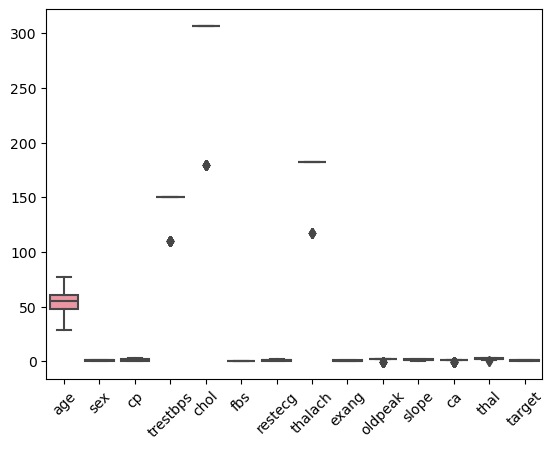

In [52]:
sns.boxplot(dfh)
plt.xticks(rotation = 45)

### Imbalance

In [53]:
dfh["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [54]:
dfh["target"].unique()

array([1, 0], dtype=int64)

In [55]:
dfh["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

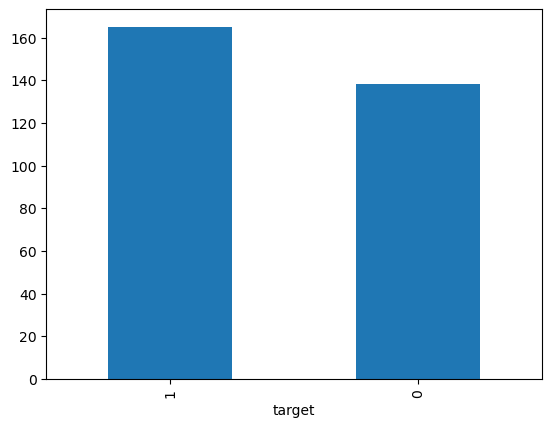

In [56]:
dfh["target"].value_counts().plot(kind = "bar")

### Data Separation

In [57]:
dfh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150.0,306.25,0.0,0,182.25,0,2.4,0,1.5,1.0,1
1,37,1,2,150.0,306.25,0.0,1,117.25,0,-0.8,0,1.5,2.0,1
2,41,0,1,150.0,306.25,0.0,0,182.25,0,2.4,2,1.5,2.0,1
3,56,1,1,150.0,306.25,0.0,1,182.25,0,2.4,2,1.5,2.0,1
4,57,0,0,150.0,179.25,0.0,1,182.25,1,2.4,2,1.5,2.0,1


In [58]:
dfh.drop("target",axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,150.0,306.25,0.0,0,182.25,0,2.4,0,1.5,1.0
1,37,1,2,150.0,306.25,0.0,1,117.25,0,-0.8,0,1.5,2.0
2,41,0,1,150.0,306.25,0.0,0,182.25,0,2.4,2,1.5,2.0
3,56,1,1,150.0,306.25,0.0,1,182.25,0,2.4,2,1.5,2.0
4,57,0,0,150.0,179.25,0.0,1,182.25,1,2.4,2,1.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,150.0,306.25,0.0,1,182.25,1,2.4,1,1.5,3.0
299,45,1,3,150.0,306.25,0.0,1,182.25,0,2.4,1,1.5,3.0
300,68,1,0,150.0,306.25,0.0,1,182.25,0,-0.8,1,-0.5,3.0
301,57,1,0,150.0,306.25,0.0,1,182.25,1,2.4,1,1.5,3.0


In [59]:
x = dfh.drop("target",axis=1)

In [60]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,150.0,306.25,0.0,0,182.25,0,2.4,0,1.5,1.0
1,37,1,2,150.0,306.25,0.0,1,117.25,0,-0.8,0,1.5,2.0
2,41,0,1,150.0,306.25,0.0,0,182.25,0,2.4,2,1.5,2.0
3,56,1,1,150.0,306.25,0.0,1,182.25,0,2.4,2,1.5,2.0
4,57,0,0,150.0,179.25,0.0,1,182.25,1,2.4,2,1.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,150.0,306.25,0.0,1,182.25,1,2.4,1,1.5,3.0
299,45,1,3,150.0,306.25,0.0,1,182.25,0,2.4,1,1.5,3.0
300,68,1,0,150.0,306.25,0.0,1,182.25,0,-0.8,1,-0.5,3.0
301,57,1,0,150.0,306.25,0.0,1,182.25,1,2.4,1,1.5,3.0


In [61]:
y = dfh["target"]

In [62]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Data Splitting

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.20)

In [65]:
x.shape, x_train.shape

((303, 13), (242, 13))

In [66]:
y.shape

(303,)

In [67]:
from sklearn.svm import SVC

In [68]:
svm_model = SVC()

In [69]:
svm_model

SVC()

In [70]:
svm_model.fit(x_train,y_train)

SVC()

In [71]:
svm_model.score(x_test,y_test)

0.5409836065573771

In [72]:
slist = []
for i in range(1000):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size = 0.20, random_state = i)
    svc = SVC()
    svc.fit(xtrain,ytrain)
    s = svc.score(xtest,ytest)
    slist.append(s)
m = max(slist)
print(m,end = "==>")
a = slist.index(m)
print(a)

0.6885245901639344==>258
